<img src="https://idp.bits-pilani.ac.in/idp/login_files/logo.gif">


<h1><center> ML Assignment Number 2-Q2_Group 227</center></h1>



## The Data


The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD

### Our Goal

#### Handling of missing values, outliers, if any .
#### Identifying data and model issues if any.
#### Choice of packages and distance measure used. justify your answer.
####  Selection of train, test split.
#### Final model creation and accuracy matrix selected for the model.
#### Future scope of the work.  


### Data Overview

In [2]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Loading the data and other imports

In [29]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns


#Import data from given dataset - parkinsons.data.csv file.
df = pd.read_csv("parkinsons.data.csv")
print ("Given dataset: \n==============")
df.info()


Given dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             1

## Exploratory Data Analysis
### 1. Handling Missing Values

In [13]:
# Counting the number of missing values
print("No missing values found in the dataset:")
print(df.isna().sum()) 


No missing values found in the dataset:
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64


### Based on the above, found that there are no Missing values

### 2. Identifying data and model issues 

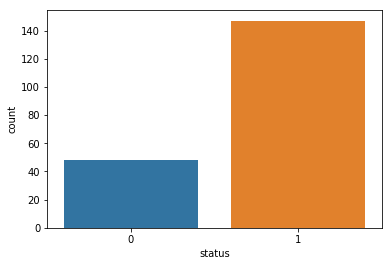

In [17]:
#Removing name column from data set as 'name' is not a feature.
df.drop(columns = ['name'],inplace =  True)
#Rearranging the columns
df = df[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]]
#Removing header column from dataframe
df.to_csv('parkinsons_preprocced.data.csv', header=False, index=False)

sns.countplot(x='status',data=df)

In [20]:
### Creating classification model using KNN  ####
# Loading the preprocced dataset (local path)
preprocced_dataset = "parkinsons_preprocced.data.csv"
# features
features = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","spread1","spread2","D2","PPE","status"]
dataset = pd.read_csv(preprocced_dataset, names = features)
print ("\nPreprocessed dataset: \n=====================")
dataset.info()

# Store the dataset as an array for easier processing
array = dataset.values
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(array)
# X stores feature values
X = scaled[:,0:22]
# Y stores 
Y = scaled[:,22]
validation_size = 0.25



Preprocessed dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE       

###  KNN as a classifier.  

#### Splitting into Training and Test

In [25]:
# randomize which part of the data is training and which part is validation
seed = 7
# split dataset into training set (80%) and validation set (20%)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [22]:
# 10-fold cross validation to estimate accuracy (split data into 10 parts; use 9 parts to train and 1 for test)
num_folds = 10
num_instances = len(X_train)
seed = 7
# use the 'accuracy' metric to evaluate models (correct / total)
scoring = 'accuracy'

results = []
clf = KNeighborsClassifier()
#K-Fold cross validator.
kfold = RepeatedKFold(n_splits = num_instances, n_repeats = num_folds, random_state = seed)

## Evaluating Model Performance.

**Plot out the validation loss versus the training loss.**

In [28]:

### Evaluate a score by cross-validation  ####
cv_results = cross_val_score(clf, X_train, Y_train, cv = kfold, scoring = scoring)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print ("\nAccuracy matrix : \n=================")
print("KNN")
print(accuracy_score(Y_validation, predictions)*100)
print(matthews_corrcoef(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


Accuracy matrix : 
KNN
97.95918367346938
0.9367496997597597
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.97      1.00      0.99        39

   micro avg       0.98      0.98      0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49



#### Above results show that the KNN classifier is close to 98 percent accurate , this ML model can be used for diagnosis  of Parkinsons disease and this is more reliable and robust and requires only certain features indicating that this is cheaper to implement.

## Future Scope
#### KNN classifier gave a F1 score of 98 % this suggests that a machine learning model can be implemented to significantly improve diagnosis methods of Parkinson's Disease. 
#### The same implementation can be done using the MLP neural network and results can be compared thereafter.
#### Also we can check on the accuracy changes for different split of the Test and Training data (70 - 30, 75-25 )
#### Currently the implemenation is a jypyter notebook, to have this evaluated on a daily basis, this should be planned for automation of the extraction of new data, Training the ML model and determining the the best model, best Training\Testing split

### THANK YOU!